# For-Python-casting state-space using Python: a simple/practical approach

## Simple linear regression model
The simple linear regression model can be written as follows: 

$y_{i}=a+b\times x_i+e_i$

Where $y_i$ is the dependent variable with i=1,2,.,n. $x_i$ is defined as the independent variable while $a$ and $b$ are the regression coefficients. In particular, $b$ measures the impact of x on the y while $a$ is the intercept (constant term) that adds up. Finally, $e_i$ represents the error term containing everything the model does not know about the dependent variable. Note that $e_i$ is also defined as the residuals since we can write: $e_i=y_i-a-b\times x_i$
The parameters of this model are estimated using the so-called Least Squares method (or Ordinary least squares). Lets first generate the model and try to figure out its dynamics using the following code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(1)
x = np.random.chisquare(6, 40)
e = np.random.normal(0, 1, 40)
y = -1.3 + 0.8*x + e
pointsline = -1.3 + 0.8*np.arange(0, 20)

plt.figure()
plt.plot(x, y, '*', np.arange(0, 20), pointsline)
plt.title("What is the relation between x and y?")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

For example, we know that the level of appreciation of a beer depends (among other factors) upon the temperature of the beer. Suppose we ask 200 clients (both female and male) to express their appreciation for the beer for each temperature included beteen 2 degres and 12 degrees Celsius. The chunk below is a simulation:

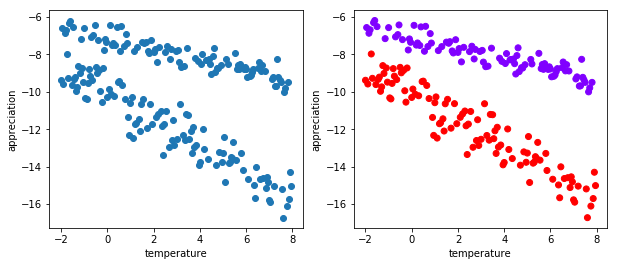

In [2]:
n = 200
np.random.seed(6)
gender = np.round(1.1*np.random.uniform(0, 1, n), 0)
temperature = -2 + np.arange(0, 9.99, .05)
ef = -.4 * np.random.normal(0, 1, n)
em = -.8 * np.random.normal(0, 1, n)
appreciation = np.zeros(n)

for i in range(n):
    if gender[i] == 0:
        appreciation[i] = -7-0.3*temperature[i]+ef[i]
    else:
        appreciation[i] = -10-0.7*temperature[i]+em[i]

plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.scatter(temperature, appreciation)
plt.xlabel('temperature')
plt.ylabel('appreciation')
plt.subplot(1, 2, 2)
plt.scatter(temperature, appreciation, cmap='rainbow', c=gender)
plt.xlabel('temperature')
plt.ylabel('appreciation')
plt.show()

Her we note that there is a negative relation between the temperature and the appreciation of clients in the supermarket. However, it seems that female clients appreciate the beer differently compared to male, when the temperature change. Can you sketch these differences?


We can evaluated these differences by running a linear regression considering the variable appreciation as $y$ and the variable temperature as $x$ (note that here temperature is a control variable that affects the appreciation of the beer). This can be done as follows:

In [3]:
data = pd.DataFrame(np.array([appreciation, temperature]).transpose())
OurRegression = data.describe()
print(OurRegression)

                0           1
count  200.000000  200.000000
mean   -10.146815    2.975000
std      2.565746    2.893959
min    -16.728534   -2.000000
25%    -12.090502    0.487500
50%     -9.357094    2.975000
75%     -8.262098    5.462500
max     -6.192046    7.950000


## Optim-ization with R
Suppose we observe the following variables, i.e. x and y:

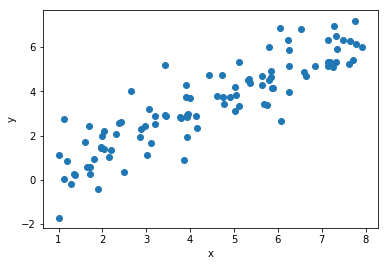

In [4]:
np.random.seed(1)
n = 100
x = np.random.uniform(1, 8, n)
y = -1*np.random.normal(0, 1, n) + 0.8*x
plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now suppose that we believe that there is a relation between x and y. For example we believe that the following relation holds $y=\beta x+\epsilon$. In other words, we believe that y is function of x and when x changes y changes according to the law expressed in the previous expression.

The following chunk makes the trick:

In [5]:
from scipy.optimize import minimize


def myfu(beta):
    b = beta
    e = y-b*x
    return np.sum(np.power(e, 2))


myrelation = minimize(myfu, 1, method='CG')
print(myrelation)

     fun: 81.40590541320964
     jac: array([3.71932983e-05])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 135
     nit: 1
    njev: 41
  status: 2
 success: False
       x: array([0.79246462])


Note that we have a function (myfu) whose last element is $sum(e^2)$. Moreover we want to minimize the function by finding a specific value (this is a 1 dimensional optimization). There are several options to optimize a function in R. the $optim$ represents a widely used tool. It works like this: 


(1) **The first part is the vector (in this case a scalar) with the parameter(s) to that optim evaluate in order to minimize the function.**

(2) **The second part is the function**

(3) **The third part is the method. Note that Brent works for unidimensional optimization. As we will discuss later, when you have two or more than to parameters (multidimensional optimization) you can either avoid specifying the method or specify a specific method (this option we do not consider for ease of comprehension)**

An alternative code, which is more involved since it run a for loop before providing the element we want to minimize, is the following:

In [6]:
e = np.zeros(n)


def myfu(beta):
    b = beta
    for i in range(n):
        e[i] = y[i] - b*x[i]
    return np.sum(np.power(e, 2))


myrelation = minimize(myfu, 1, method='CG')
print(myrelation)

     fun: 81.40590541320964
     jac: array([3.71932983e-05])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 135
     nit: 1
    njev: 41
  status: 2
 success: False
       x: array([0.79246462])


As you can see the results are the same as before! You might want to change what you want to minimize. For example, suppose you want to minimize the sum of the absolute errors. Then the following code makes the trick.

In [7]:
def myfu(beta):
    b = beta
    e = y-b*x
    return np.sum(np.abs(e))


myrelation = minimize(myfu, 1, method='CG')
print(myrelation)

     fun: 68.36274761966878
     jac: array([9.04400444])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 46
     nit: 2
    njev: 13
  status: 2
 success: False
       x: array([0.7814127])


Note however that the results do not correspond as above.

### Exercise (unidimensional)
##### Consider the following code:

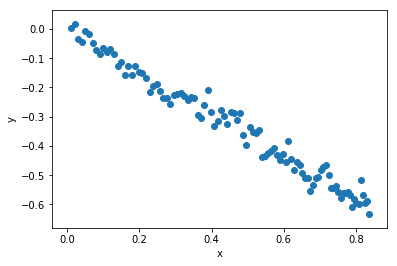

In [8]:
np.random.seed(1224)
x = np.sin(np.arange(0.01, 1, 0.01))

b = np.random.uniform(0, 1, 1)
y = -b*x + 0.03*np.random.normal(0, 1, len(x))

plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Suppose we believe that there exist the following relation $y=\beta x+\epsilon$.
##### Can you find the value of beta that minimize the sum of squared epsilon? 
##### Can you find the value of beta that minimize the sum of absolute epsilon?

In [9]:
def myfu(beta):
    b = beta
    e = y - b*x
    return sum(abs(e))


myrelation = minimize(myfu, 1, method='CG')
print('b = ', b[0])
print('predict = ', abs(myrelation.x[0]), '\n')
print(myrelation)

b =  0.7245644212327997
predict =  0.7320396712384174 

     fun: 2.1096634219255783
     jac: array([0.33670658])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 120
     nit: 2
    njev: 38
  status: 2
 success: False
       x: array([-0.73203967])


Suppose that we want to maximize a function. Consider the function $y=\frac{(\exp{-0.5(x-4)^2)}}{\sqrt{2\pi}}$ (By the way do you recogize what function is this? If not, try to make a plot of it!). Now suppose we wish to maximize it. Then we should use the option $control=list(fnscale=-1)$ inside optim. For example

In [10]:
import math


def myfun(g):
    y = math.exp(math.pow(-.5*(g-4), 2)) / math.pow(2*math.pi, 2)
    return y


myrelation = minimize(myfun, 1, method='CG')
print(myrelation)

     fun: 0.025330295910584652
     jac: array([2.32830644e-09])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([4.00000018])


Now suppose we want to minimize a function of two variables. For example, consider the following function $z=(-2+x)^2+(4+y)^2$ and assume we want to find the values of x and y that minimize z. Then we can still use optim as follows:

In [11]:
def myfun(myvalues):
    x = myvalues[0]
    y = myvalues[1]
    return math.pow(x-2, 2)+math.pow(4+y, 2)


myrelation = minimize(myfun, [1, 3])
print(myrelation)

      fun: 1.954812841052518e-12
 hess_inv: array([[0.99000003, 0.06999989],
       [0.06999989, 0.50999993]])
      jac: array([2.65250342e-06, 9.43505326e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 2.00000132, -3.99999954])


Suppose we want to have some fun by visualizing this z function as above. This is a nice code that allows you to see the beauty & power of R-graphics:

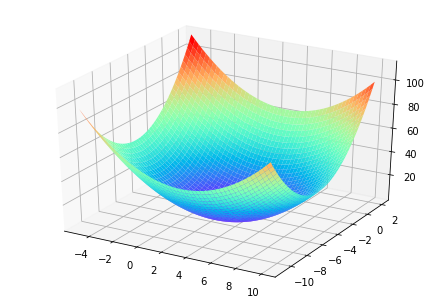

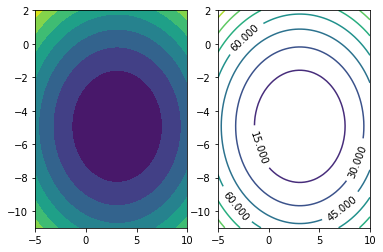

In [12]:
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(-5, 10, 50)
y = np.linspace(-11, 2, 50)
[X, Y] = np.meshgrid(x, y)

def f(m, n):
    return np.power(-2+m, 2)+np.power(4+n, 2)


z = np.zeros([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = f(x[i], y[j])

fig = plt.figure()
Axes3D(fig).plot_surface(X, Y, z, rstride=1, cstride=1, cmap='rainbow')
plt.figure()
plt.subplot(1, 2, 1)
plt.contourf(X, Y, z)
plt.subplot(1, 2, 2)
ctr = plt.contour(X, Y, z)
plt.clabel(ctr, fontsize=10, colors='k')
plt.show()

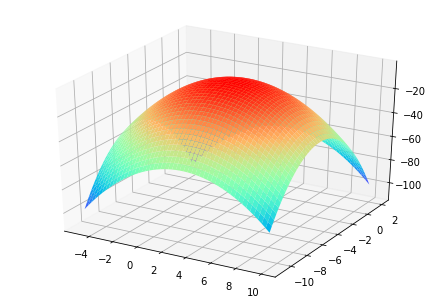

In [13]:
x = np.linspace(-5, 10, 50)
y = np.linspace(-11, 2, 50)


def f(x, y):
    return -math.pow(-2+x, 2)-math.pow(4+y, 2)


z = np.zeros([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = f(x[i], y[j])

fig = plt.figure()
Axes3D(fig).plot_surface(X, Y, z, rstride=1, cstride=1, cmap='rainbow')
plt.show()


### The Normal distribution

Suppose we want to generete a normal distribution with mean 0.2 and variance 1.5 with $R$. This simple code does the job:

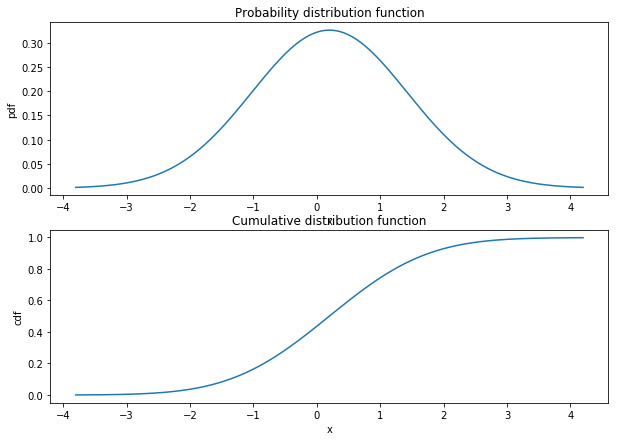

In [14]:
x = np.linspace(-3.8, 4.2, 800)
mu = 0.2
sigma = math.sqrt(1.5)
pdf = cdf = np.array([])
for i in range(len(x)):
    temp1 = 1/math.sqrt(2*math.pi*math.pow(sigma, 2))
    temp2 = math.exp(-.5*(math.pow(x[i]-mu, 2)/math.pow(sigma, 2)))
    pdf = np.append(pdf, temp1 * temp2)
    cdf = np.append(cdf, np.sum(pdf)/100)


plt.figure(figsize = [10,7])
plt.subplot(2, 1, 1)
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title("Probability distribution function")
plt.subplot(2, 1, 2)
plt.plot(x, cdf)
plt.xlabel('x')
plt.ylabel('cdf')
plt.title("Cumulative distribution function")
plt.show()

### Bivariate Normal distribution

Suppose that two variables, say x and y, are jointly normal distributed with mean respectively $\mu_x$,  $\mu_y$ and variance respectively $\sigma_x^2$ and  $\sigma_y^2$. Moreover suppose that the covariance between the two variables is  $\sigma_{xy}$.

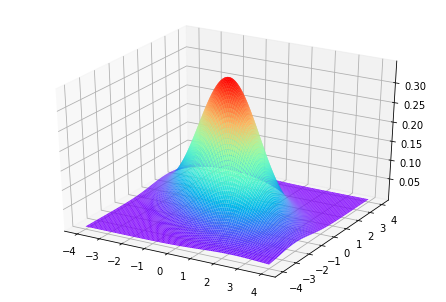

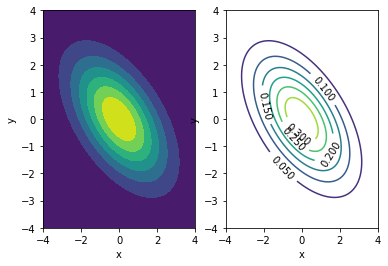

In [15]:
mx = my = 0
varx = 0.5
vary = 0.6
covxy = -0.3
sigma = np.zeros([2, 2])
sigma[0][0] = varx
sigma[1][1] = vary
sigma[0][1] = sigma[1][0] = covxy
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
[X, Y] = np.meshgrid(x, y)


def f(x, y):
    temp1 = 1/(2*math.pi*np.sqrt(np.linalg.det(sigma)))
    temp2 = math.exp(-.5*((vary*math.pow(x-mx, 2)+(y-my)*(-2*(x-mx)*covxy+varx*(y-my)))/(varx*vary-2*covxy)))
    return temp1*temp2


z = np.empty([len(x), len(y)])
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j] = f(x[i], y[j])

fig = plt.figure()
Axes3D(fig).plot_surface(X, Y, z, rstride=1, cstride=1, cmap='rainbow')
plt.figure()
plt.subplot(1, 2, 1)
plt.contourf(X, Y, z)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
ctr = plt.contour(X, Y, z)
plt.clabel(ctr, fontsize=10, colors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using the results as above one obtains:


$$
\begin{array}{c}
p(x,y)=\frac{1}{2\pi \left(\sigma_x^2\sigma_{y}^2-\sigma_{xy}^2\right)^{\frac{1}{2}}}\times \\
\times exp(-0.5\left[\begin{array}{cc}
 \left(x-\mu_x-\frac{\sigma_{xy}}{\sigma_{y}^2}(y-\mu_y)\right)&y-\mu_y
\end{array}\right]\left[\begin{array}{cc}
 \frac{1}{\sigma_x^2-\frac{\sigma_{xy}^2}{\sigma_{y}^2}}&0 \\
 \\
0 &\frac{1}{\sigma_{y}^2}
\end{array}\right]\left[\begin{array}{cc}
  \left(x-\mu_x-\frac{\sigma_{xy}}{\sigma_{y}^2}(y-\mu_y)\right)\\
  y-\mu_y
\end{array}\right])
\end{array}
$$

## State-Space models and the Kalman filter

### Kalman filter example

Consider the following model: 

\begin{equation}\label{eq:ex1}
\begin{array}{c}
y_t=\alpha_{t-1}+e_t\\
\alpha_{t}=.9 \alpha_{t-1}+u_t 
\end{array}
\end{equation}

Where $\sigma_{e}^2=.8$ and $\sigma_{u}^2=.4$. Now we can generate it using the following code:

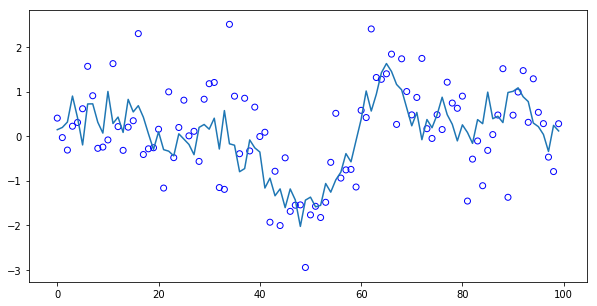

In [16]:
n = 100
np.random.seed(1123)
e = np.random.normal(0, 0.8, n)
u = np.random.normal(0, 0.4, n)
y = np.empty(n)
alpha = np.empty(n)
y[0] = e[0]
alpha[0] = u[0]

for t in range(1, n):
    y[t] = alpha[t-1]+e[t]
    alpha[t] = 0.9*alpha[t-1]+u[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, alpha)
plt.scatter(time, y, facecolors='none', edgecolors='b')
plt.show()

We now implement the Kalman filter as above. First note that since the state equation $\alpha_t$ is an Autoregressive process of order one we can initialize $a_1=0$ and $p_1=\frac{\sigma_{u}^2}{1-0.81}=2.11$ (the last is the variance of $\alpha_t$). Now, assuming that we know the variances of the noises (this is not the case in empirical situations) we can make use of the following code:


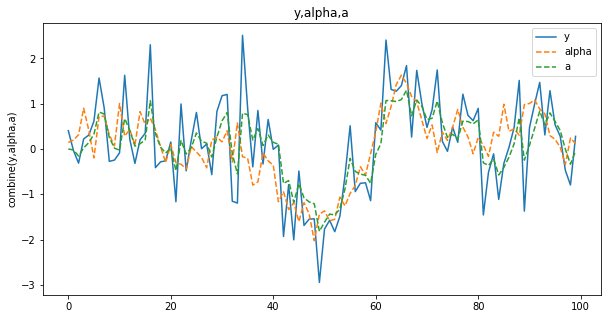

In [17]:
n = 100
sigmae, sigmau = .8, .4
w, z = 0.9, 1
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0] = 0
p[0] = 2.11

for t in range(1, n):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+sigmae)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+sigmau
    v[t] = y[t]-z*a[t-1]
    a[t] = w*a[t-1]+k[t]*v[t]

plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha, '--', time, a, '--')
plt.legend(['y', 'alpha', 'a'])
plt.ylabel('combine(y,alpha,a)')
plt.title('y,alpha,a')
plt.show()

Wonderful and very easy to implement using R!


##### Exercise: Consider the following model: $$\begin{array}{c}y_t=1.05*\alpha_{t-1}+e_t\\\alpha_{t}=.5+.8 \alpha_{t-1}+u_t \end{array}$$ Where $\sigma_{e}^2=2$ and $\sigma_{u}^2=.3$. Now, using set.seed(321) do the following: (1) generate it (2) implement the Kalman filter (3) plot your results



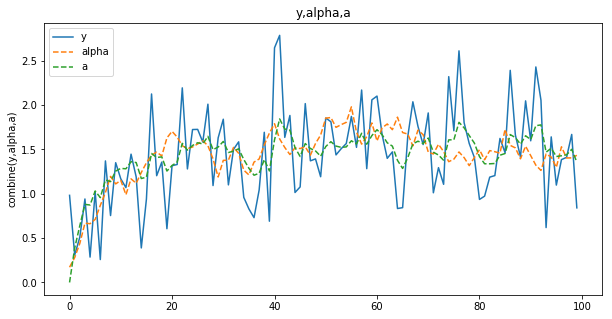

In [18]:
def StateSpaceGen(param):
    sigmae, sigmau, z, w, const = param[0], param[1], param[2], param[3], param[4]
    n = 100
    e = np.random.normal(0, sigmae, n)
    u = np.random.normal(0, sigmau, n)
    y = np.ones(n)
    alpha = np.ones(n)
    y[0], alpha[0] = e[0], u[0]
    for t in range(1, n):
        y[t] = z*alpha[t-1]+e[t]
        alpha[t] = const+w*alpha[t-1]+u[t]
    return np.array([y, alpha])


def KF(param):
    sigmae, sigmau, z, w, const = param[0], param[1], param[2], param[3], param[4]
    y = param[5]
    n = len(y)
    a, p, k, v = [np.ones(n) for _ in range(4)]
    a[0], p[0] = y[0], 10000
    if w < 1:
        a[0] = 0
        p[0] = sigmau/(1-pow(w, 2))
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+sigmae)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+sigmau
        v[t] = y[t]-z*a[t-1]
        a[t] = const+w*a[t-1]+k[t]*v[t]
    return np.array([a, v, k, p])


n = 100
np.random.seed(222)
time = np.linspace(0, n-1, n)
y1 = StateSpaceGen([.5, .1, 1, .8, .3])
y2 = KF([.5, .1, 1, .8, .3, y1[0]])
plt.figure(figsize=[10, 5])
plt.plot(time, y1[0], time, y1[1], '--', time, y2[0], '--')
plt.legend(['y', 'alpha', 'a'])
plt.ylabel('combine(y,alpha,a)')
plt.title('y,alpha,a')
plt.show()

## Likelihood function and model estimation

We have shown the derivation of the Kalman filter and its implementation assuming we know the variances of the errors. However, the question that now comes: what are the parameters to be chosen in order to make an estimate of $E(\alpha_t|Y_t)$ as closed as possible to $E(\alpha_t)$ ?

This chunck below provides an example:

The results of the standard KF approach 
 [0.878  0.1671 0.     0.5382]
The true parameters 
 [0.86, 0.5, 0.05, 0.6]


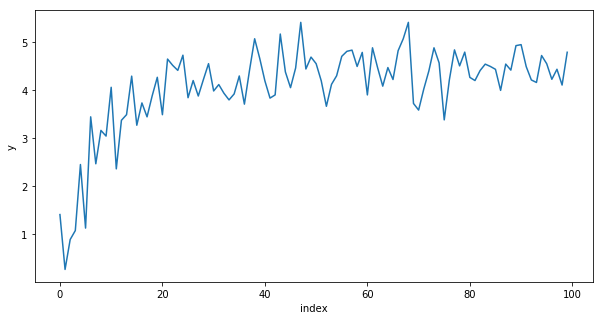

In [19]:
n = 100
np.random.seed(1)
su, se = 0.05, 0.5
qreal = su/se
e = np.random.normal(0, se, n)
u = np.random.normal(0, su, n)
z, wreal, const = 1, 0.86, 0.6
y = np.ones(n)
alpha = np.ones(n)
y[0], alpha[0] = const+e[0], const+u[0]
for t in range(1, n):
    y[t] = z*alpha[t-1]+e[t]
    alpha[t] = const+wreal*alpha[t-1]+u[t]
    
    
# standard Kalman filter approach
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0] = 0, 10


def fu(mypa):
    w, se, su, co = abs(mypa[0]), abs(mypa[1]), abs(mypa[2]), abs(mypa[3])
    z, likelihood = 1, 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+se)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+su
        v[t] = y[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        likelihood += .5*math.log(2*math.pi)+.5*math.log(pow(z, 2)*p[t-1]+se)+.5*(pow(v[t], 2)/(pow(z, 2)*p[t-1]+se))
    return likelihood


results = minimize(fu, [.85, .5, .3, .3], method='CG')
print("The results of the standard KF approach", '\n', np.round(np.abs(results.x), 4))
print("The true parameters", '\n', [wreal, se, su, const])

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y)
plt.xlabel('index')
plt.ylabel('y')
plt.show()

### Initializing the Kalman filter recursions

These recursions need to be initialized. In particular, when we are at time $t=1$ we need to determine the value of $a_1$. In principle the choice of this value depends on the type of process followed by $x_t$. For example, when $x_t$ follows an AR(1) process  (i.e. $0\leq w\leq 1$) , the best choice is $a_1=0$ since the process is mean reverting. On the other hand, when $x_t$ is a random walk (i.e. $w=1$) it is better to use $a_1=y_1$. We do not consider the case when $w>1$ since this would be an explosive autoregressive process. Finally, when using the standard Kalman filter recursions, one should also initialize $p_t$. For the AR(1) case, as shown above, one can initialize as follows $p_1=\frac{\sigma_u^2}{1-\omega^2}$. When $\omega=1$, as in the random walk process, one should use $p_1=\infty$. Indeed, the so called diffuse initialization proposes, for the case considered, $p_1=10000$, an arbitrary high number. 


### Concentrated Log-likelihood in action!

The code below generate a model and estimate it using the Concentrated Log-likelihood before:


In [20]:
n = 100
np.random.seed(61)
su, se = 0.1, 0.4
qreal = su/se
e = np.random.normal(0, se, n)
u = np.random.normal(0, su, n)
z, wreal = 1, 0.97
y = np.ones(n)
alpha = np.ones(n)
y[0], alpha[0] = e[0], u[0]
for t in range(1, n):
    y[t] = z*alpha[t-1]+e[t]
    alpha[t] = wreal*alpha[t-1]+u[t]
# standard Kalman filter approach
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0] = 0, 10


def fu(mypa):
    w, q = abs(mypa[0]), abs(mypa[1])
    z, likelihood, sigmae = 1, 0, 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+ q
        v[t] = y[t]-z*a[t-1]
        a[t] = w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


results = minimize(fu, [.85, .5])
print("The results of the standard KF approach", '\n', np.round(results.x,3))
print("The true parameters", '\n', [wreal, qreal])

The results of the standard KF approach 
 [0.875 0.209]
The true parameters 
 [0.97, 0.25]


One can see that the estimates are rather closed to the true parameters. 

## State-Space models and the Kalman filter in action!

We can now stop with the theory and start getting fun using $R$ and reproducing the results we obtained above.

For example suppose we want to generete the following state-space model:

$$\begin{array}{c}y_t=\alpha_{t-1}+e_t\\\alpha_{t}=.2+.85 \alpha_{t-1}+u_t \end{array}$$ 

where $e \sim Normal(\mu_e=0;\sigma_{e}^2=.1)$ and $u \sim Normal(\mu_u=0;\sigma_{u}^2=.05)$ where $n=100$. In addition suppose we want to estimate the parameters of the model. 

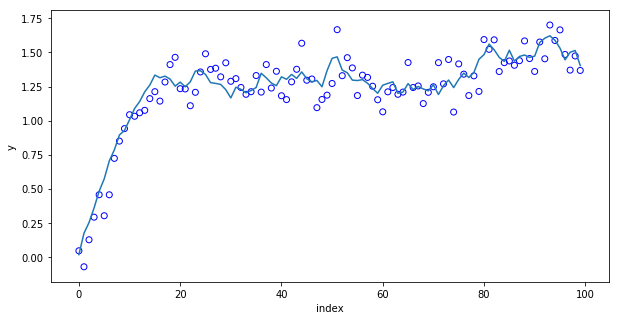

In [21]:
n = 100
np.random.seed(1256)
e = np.random.normal(0, 0.1, n)
u = np.random.normal(0, 0.05, n)
const = 0.2
y = np.empty(n)
alpha = np.empty(n)
y[0] = e[0]
alpha[0] = u[0]

for t in range(1, n):
    y[t] = alpha[t-1]+e[t]
    alpha[t] = const + 0.85*alpha[t-1]+u[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, alpha)
plt.scatter(time, y, facecolors='none', edgecolors='b')
plt.xlabel('index')
plt.ylabel('y')
plt.show()

Using the standard KF we obtain the following results:

In [22]:
# standard Kalman filter approach
a, p, k, v = [np.ones(n) for _ in range(4)]
z, a[0], p[0] = 1, 0, 1


def fu(mypa):
    w, q, co = abs(mypa[0]), abs(mypa[1]), abs(mypa[2])
    likelihood, sigmae = 0, 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1] + q
        v[t] = y[t]-z*a[t-1]
        a[t] = const+w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


results = minimize(fu, [.9, 1, .1])
v[0] = 0
w, q, co = abs(results.x[0]), abs(results.x[1]), abs(results.x[2])
likelihood, sigmae = 0, 0

for t in range(1, len(y)):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = y[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae = sigmae+pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)
    likelihood = likelihood+.5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
likelihood<-likelihood+.5*n*math.log(sigmae/n)
sigmae = sigmae/len(y)
sigmau = q*sigmae

print('  co, w, z, sigmae, sigmau', '\n', np.round([co, w, z, sigmae, sigmau], 2))

  co, w, z, sigmae, sigmau 
 [0.1  0.85 1.   0.03 0.01]


### The Local level model (or simple exponential smoothing)

The local level is one of the simplest state-space models. This model assumes $w=z=1$ and $constant=0$, such that we have: 

$$\begin{array}{c}y_t=\alpha_{t-1}+e_t\\
\alpha_{t}= \alpha_{t-1}+u_t \end{array}$$ 

As a consequence one has only one parameter to estimate $q$. This is the only ingredient that maximize the concentreted log Likelihood function. 

For example suppose we want to generete the following state-space model:

where $e \sim Normal(\mu=0;\sigma_{e}^2=.5)$ and $u \sim Normal(\mu=0;\sigma_{u}^2=.2)$ where $n=100$. Here q is 0.4. 

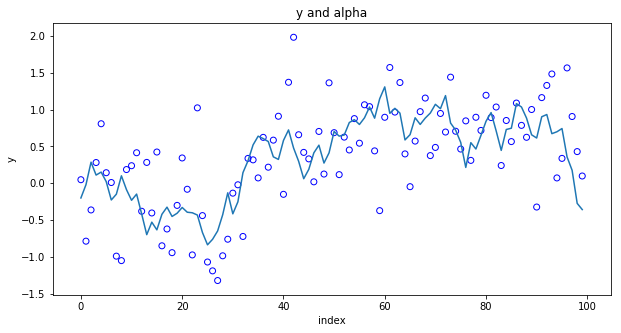

In [23]:
n = 100
np.random.seed(153)
e = np.random.normal(0, 0.5, n)
u = np.random.normal(0, 0.2, n)
y = np.empty(n)
alpha = np.empty(n)
y[0] = e[0]
alpha[0] = u[0]

for t in range(1, n):
    y[t] = alpha[t-1]+e[t]
    alpha[t] = alpha[t-1]+u[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, alpha)
plt.scatter(time, y, facecolors='none', edgecolors='b')
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

We can now estimate this model with the KF recursions. The code below estimate the model with the 4 recursions.

In [24]:
# standard Kalman filter approach
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0] = y[0], 10000

def fu(mypa):
    q = abs(mypa)
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = y[t]-z*a[t-1]
        a[t] = w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


bnds = [[0, 1]]
results = minimize(fu, [0.2], bounds=bnds)
print('q = ', np.round(results.x[0],4))

q =  0.0496


We now derive the estimates of the parameters (the two variances)

In [25]:
z = w = 1
q = results.x[0]
sigmae = 0
for t in range(1, n):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = y[t]-z*a[t-1]
    a[t] = w*a[t-1]+k[t]*v[t]
    sigmae = sigmae+pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)
#This is the variance of e
print('sigmae = ', np.round(sigmae/(n-1),4))
#This is the variance of u
print('sigmau = ', np.round(q*(sigmae/(n-1)),4))

sigmae =  0.2682
sigmau =  0.0133


### The Local Level with drift: (the Theta method)

This model is a simple variant of the local level but it is quite popular among the forecasters since it competes very well with other strong benchmark. This is also a reparametrization of the so-called Theta method as shown in (TOADD).


For example suppose we want $e \sim Normal(\mu=0;\sigma_{e}^2=.8)$ , $u \sim Normal(\mu=0;\sigma_{u}^2=.1)$ and $constant=.1$, where $n=100$. Here q is 0.125. This code generates the local level with drift:

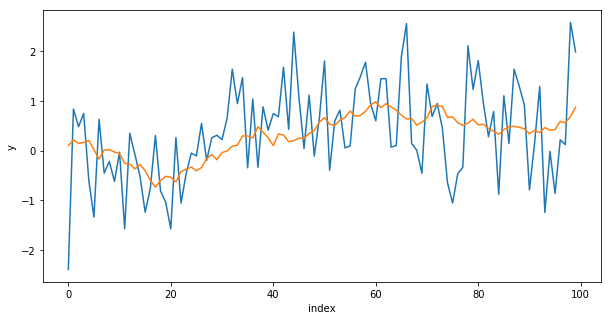

In [26]:
n = 100
np.random.seed(572)
e = np.random.normal(0, 0.8, n)
u = np.random.normal(0, 0.1, n)
y = np.empty(n)
alpha = np.empty(n)
y[0] = e[0]
alpha[0] = u[0]
co = 0.1
for t in range(1, n):
    y[t] = co+alpha[t-1]+e[t]
    alpha[t] = alpha[t-1]+u[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha)
plt.xlabel('index')
plt.ylabel('y')
plt.show()

The solid line is the observed data $y_t$ while the dotted line is the state $\alpha_t$. We now estimate the model maximizing the concentrated log-likelihood using the KF:

In [27]:
# standard Kalman filter approach
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0], v[0] = y[0], 10000, 0


def fu(mypa):
    q, co = abs(mypa[0]), abs(mypa[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = y[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


results = minimize(fu, [.6, .2])
z = w = 1
q, co = results.x[0], results.x[1]
sigmae = 0
for t in range(1, n):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = y[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae = sigmae+pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)
#This is the variance of e
print('sigmae = ', np.round(sigmae/(n-1), 4))
#This is the variance of u
print('sigmau = ', np.round(q*(sigmae/(n-1)), 4))

sigmae =  0.6636
sigmau =  0.0203


Suppose we want to create a function that generate a time series model and a function that estimate the model using the steady-stae approach, say the Theta model, and return the estimates of the parameters, the estimates of $a_t$ and the prediction error $v_t$.

The first function can be created like that:

In [28]:
def generateTheta(n, sigmae, sigmau, co):
    e = np.random.normal(0, sigmae, n)
    u = np.random.normal(0, sigmau, n)
    y = np.empty(n)
    alpha = np.empty(n)
    y[0] = e[0]
    alpha[0] = u[0]
    for t in range(1, n):
        alpha[t] = co+alpha[t - 1] + u[t]
        y[t] = alpha[t-1]+e[t]
    return y

The second function can be created like that:

In [29]:
def EstimateTheta(y):
    n = len(y)
    a, p, k, v = [np.ones(n) for _ in range(4)]
    a[0], p[0] = 0, 0
    results = minimize(fu, [.5, .2])
    v[0] = 0
    z = w = 1
    q, co = results.x[0], results.x[1]
    sigmae = 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2) * p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = y[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae += pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)
    sigmae = sigmae / len(y)
    sigmau = q * sigmae
    return [sigmae, sigmau, co]

Let's test if they work!

In [30]:
np.random.seed(11)
print(EstimateTheta(generateTheta(100, .6, .2, 1)))

[-3.6933494038389654, 0.11285841712842146, -0.008347814016537945]


## Single Source of Error approach

### The exponential smoothing with one source of error

Lets see the single source of error is practice. Below I generate an exponential smoothing model:

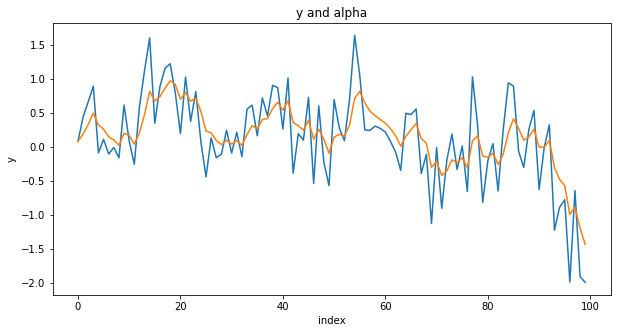

In [31]:
np.random.seed(213)
n = 100
e = np.random.normal(0, 0.6, n)
gamma = 0.3
y = np.empty(n)
alpha = np.empty(n)
y[0] = e[0]
alpha[0] = e[0]
for t in range(1, n):
    y[t] = alpha[t-1]+e[t]
    alpha[t] = alpha[t-1]+gamma*e[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha)
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

We can now estimate this model with the two recursions.

In [32]:
a = np.empty(n)
a[0] = y[0]
z = 1
e = np.empty(len(y))


def fu(mypa):
    gamma = abs(mypa)
    for t in range(1, n):
        e[t] = y[t]-z*a[t-1]
        a[t] = a[t-1]+gamma*e[t]
    temp = np.sum(np.power(e, 2))/n
    return temp

results = minimize(fu, [.2], bounds=[[0, 1]])
print('gamma = ', results.x[0])

gamma =  0.3621706213838492


### The Theta method with one source of error

Lets see the single source of error is practice. Below I generate an exponential smoothing model:

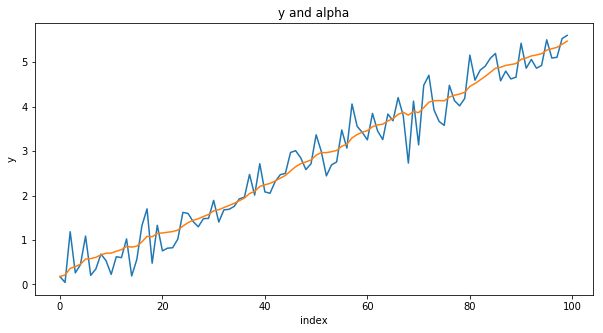

In [33]:
np.random.seed(5)
n = 100
e = np.random.normal(0, 0.4, n)
gamma = 0.1
con = 0.05
y = np.empty(n)
alpha = np.empty(n)
y[0] = e[0]
alpha[0] = e[0]
for t in range(1, n):
    y[t] = alpha[t-1]+e[t]
    alpha[t] = con+alpha[t-1]+gamma*e[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha)
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

We can now estimate this model with the two recursions.

In [34]:
a = np.empty(n)
a[0] = y[0]
z = 1
e = np.empty(len(y))


def fu(mypa):
    gamma, co = abs(mypa[0]), abs(mypa[1])
    for t in range(1, n):
        e[t] = y[t]-z*a[t-1]
        a[t] = co+a[t-1]+gamma*e[t]
    temp = np.sum(np.power(e, 2))/n
    return temp

results = minimize(fu, [.2, .1])
print('gamma = ', results.x[0])
print('const = ', results.x[1])

gamma =  -4.7273477153230575e-09
const =  0.054142222030598965


## Seasonality

Sometimes data shown a dynamic behavior that tends to repeat from time to time depending on the specific time frequency. 
In this case, the time series are affected by a seasonal component representing a non-negligiable feature of the time series dynamics. In this section we introduce two simple procedures that can be used in order to "clean" the series from this seasonal component. We first introduce the additive case and then the multiplicative case below.

### Additive seasonality

Suppose we have a quarterly series, that is a series observed 4 times per year, like this:

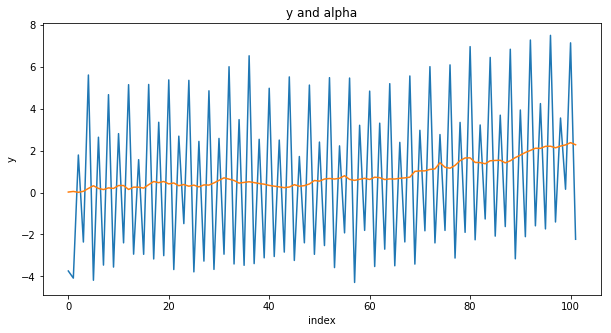

In [35]:
np.random.seed(1213)
n = 102
e = np.random.normal(0, 0.5, n)
u = np.random.normal(0, 0.1, n)
y = np.empty(n)
alpha = np.empty(n)
seasfactor = [5, -4, 2, -3]
s = 4
seasonal = np.tile(seasfactor, n // 4+1)[:n]
y[0] = e[0]+seasonal[1]
alpha[0] = u[0]
for t in range(1, n):
    y[t] = seasonal[t]+alpha[t-1]+e[t]
    alpha[t] = alpha[t-1]+u[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha)
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

One way to threat this series is to remove the seasonal component by using the so called moving average appraoch. These are the steps:

##### Take the centered moving average of the series, call it $CMA_t$
##### Subtract the $CMA$ from the original series $residuals_t=y_t-CMA_t$
##### Average the elements of $residuals_t$ by season and obtain the seasonal factor
##### Subtract the element of $y_t$ by the corresponding seasonal factor

Step one requires to create a series of average values centered at time t. Define $s$ the number of seasons considered. In the quarterly case we have 4 values. If we want to create a centered moving average we need to select values at time $t\;,\;t \pm1 \;,\;\cdots \pm \frac{s}{2}$. In the quarterly case we need to take 5 values $t\;,\;t \pm1 \;,\;t\pm2$, but we want a moving average of 4 elements! So how to create this average? In the quarterly case for example we can take $t\;,\;t \pm1 \;,\;\frac{t\pm2}{2}$, that is half of the extreme values $\pm\frac{t\pm2}{2}$. In other terms we want $\frac{0.5*x_{t-2}+x_{t-1}+x_t+x_{t+1}+0.5*x_{t+2}}{4}$.
The next code run an example of the procedure to deseasonalise a short series. The code is not smart but makes the trick:

     y    cma  residuals
0  6.0    NaN        NaN
1  2.0    NaN        NaN
2  1.0  3.125     -2.125
3  3.0  3.375     -0.375
4  7.0  3.625      3.375
5  3.0  3.875     -0.875
6  2.0    NaN        NaN
7  4.0    NaN        NaN


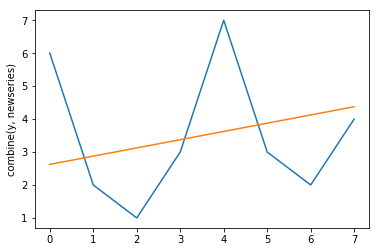

In [36]:
import pandas as pd


y = np.array([6, 2, 1, 3, 7, 3, 2, 4])
cma = np.full(len(y), np.nan)
cma[2] = (.5*y[0]+y[1]+y[2]+y[3]+.5*y[4])/4
cma[3] = (.5*y[1]+y[2]+y[3]+y[4]+.5*y[5])/4
cma[4] = (.5*y[2]+y[3]+y[4]+y[5]+.5*y[6])/4
cma[5] = (.5*y[3]+y[4]+y[5]+y[6]+.5*y[7])/4
residuals = y-cma
result = pd.DataFrame(np.array([y, cma, residuals]).transpose())
result.columns = ['y', 'cma', 'residuals']
print(result)

factors = [np.nanmean([residuals[0], residuals[4]]), np.nanmean([residuals[1], residuals[5]]),
           np.nanmean([residuals[2], residuals[6]]), np.nanmean([residuals[3], residuals[7]])]
newseries = y - np.tile(factors, 2)

time = np.linspace(0, 7, 8)
plt.figure()
plt.plot()
plt.plot(time, y, time, newseries)
plt.ylabel('combine(y, newseries)')
plt.show()

The code makes what we want but it is not elegant and need to be generalized! Lets create a smarter code as below:

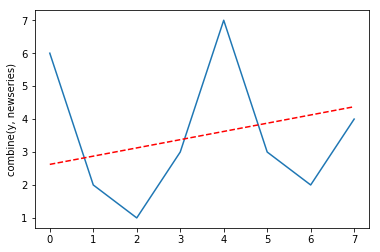

In [37]:
# s is my frequency (for example: quarterly=4;monthly=12;weekly=52)
s = 4
n = len(y)
# This create the weights to be used in the moving average
w = np.tile(1/(2*s), s+1)
w[1:s] = 1/s
# This create the centered moving average vector
cma = np.full(len(y), np.nan)
# This calculate the centered moving averag
for g in range(len(y)-s):
    cma[int(g+s/2)] = np.sum(w*y[g:(g+s+1)])
# This is the residuals
residuals = y - cma
# this creates the s factors as we want
factors = np.empty(s)
for seas in range(s):
    temp = np.array([])
    factors[seas] = np.nanmean(residuals[slice(seas, len(y)-s+seas+1, s)])
# This allows to demean the factors variable
factors = factors - np.tile(np.mean(factors), s)
# this is the last step: we take out the seasonal component
newseries = y - np.tile(factors, n//s+1)[:n]

time = np.linspace(0, n-1, n)
plt.figure()
plt.plot()
plt.plot(time, y, time, newseries, '--r')
plt.ylabel('combine(y, newseries)')
plt.show()

Lets generate a series and we then implement the process of taking out the seasonal component:

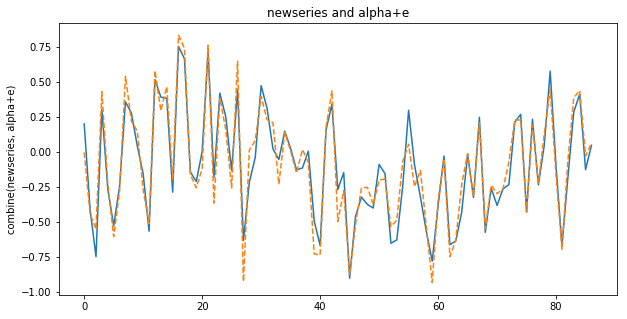

In [38]:
np.random.seed(243)
n = 87
e = np.random.normal(0, 0.3, n)
u = np.random.normal(0, 0.1, n)
y = np.empty(n)
alpha = np.empty(n)
seasfactor = [5, -4, 2, -3]
s = 4
seasonal = np.tile(seasfactor, n//s+1)[:n]
y[0] = e[0]+seasonal[0]
alpha[0] = u[0]
for t in range(1,n):
    y[t] = seasonal[t]+alpha[t-1]+e[t]
    alpha[t] = alpha[t-1]+u[t]
w = np.tile(1/(2*s), s+1)
w[1:s] = 1/s
cma = np.full(len(y), np.nan)
for g in range(len(y)-s):
    cma[int(g+s/2)] = np.sum(w*y[g:(g+s+1)])
residuals = y - cma
factors = np.empty(s)
for seas in range(s):
    temp = np.array([])
    factors[seas] = np.nanmean(residuals[slice(seas, len(y)-s+seas+1, s)])
factors = factors - np.tile(np.mean(factors), s)
newseries = y - np.tile(factors, n//s+1)[:n]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot()
plt.plot(time, newseries, time, alpha+e, '--')
plt.ylabel('combine(newseries, alpha+e)')
plt.title('newseries and alpha+e')
plt.show()

It is interesting to note that the factors are very similar to the ones that generated the series. Indeed we have:

In [39]:
print('factor = ', '\n', np.round(factors, 2))
print('seasfactor = ', '\n', seasfactor)

factor =  
 [ 4.99 -3.98  2.02 -3.03]
seasfactor =  
 [5, -4, 2, -3]


So this procedure allows to extract the seasonal component from a series. Note that a similar procedure can be run for the case where the seasonal component is multiplicative rather than additive. Below we show the procedure.

### Multiplicative seasonality

Suppose we have a quarterly series, that is a series observed 4 times per year, like this:

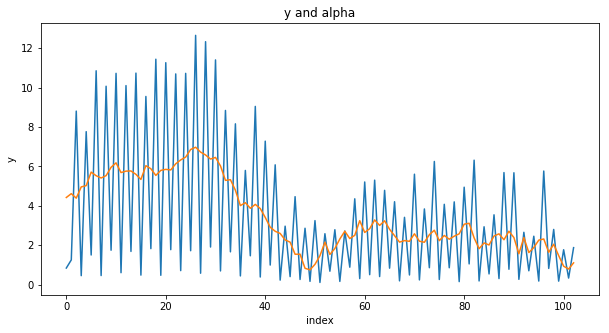

In [40]:
np.random.seed(7)
n = 103
e = np.random.normal(0, 0.5, n)
u = np.random.normal(0, 0.4, n)
y = np.empty(n)
alpha = np.empty(n)
factor = [1.7, .3, 1.9, .1]
seasonal = np.tile(factor, n // 4+1)[:n]
y[0] = e[0]
alpha[0] = 5 + u[0]
for t in range(1, n):
    y[t] = seasonal[t]*(alpha[t-1]+e[t])
    alpha[t] = alpha[t-1]+u[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha)
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

The seasonal component is evident but is different from the one shown above. In this case, it tends to amplify when the series increases. Indeed, the level $\alpha_t$ is multiplied (not added) to the factor.

Here we can remove the seasonal component by using again the moving average appraoch but in a different way. These are the steps:

##### Take the centered moving average of the series, call it $CMA_t$
##### Divide the $CMA$ from the original series $residuals_t=\frac{y_t}{CMA_t}$
##### Average the elements of $residuals_t$ by season and obtain the seasonal factor
##### Divide the element of $y_t$ by the corresponding seasonal factor

This is the code (similar to the one above) that makes the trick:

In [41]:
s = 4
n = len(y)
w = np.tile(1/(2*s), s+1)
w[1:s] = 1/s
cma = np.full(len(y), np.nan)
for g in range(len(y)-s):
    cma[int(g+s/2)] = np.sum(w*y[g:(g+s+1)])
residuals = y/cma
sfactors = np.empty(s)
for seas in range(s):
    temp = np.array([])
    sfactors[seas] = np.nanmean(residuals[slice(seas, len(y)-s+seas+1, s)])
sfactors = sfactors*s/np.sum(sfactors)
newseries = y/np.tile(sfactors, n//s+1)[:n]

Let see how it works with the (multiplicative) seasonal series generate above:

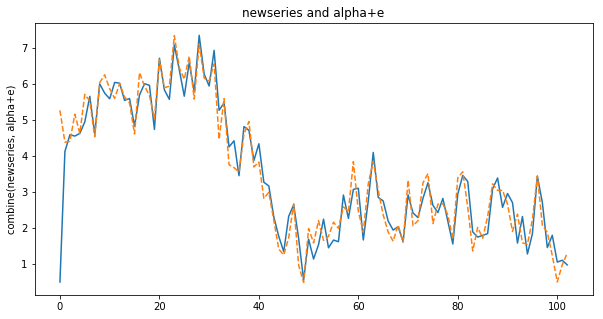

In [42]:
np.random.seed(7)
n = 103
e = np.random.normal(0, 0.5, n)
u = np.random.normal(0, 0.4, n)
y = np.empty(n)
alpha = np.empty(n)
seasfactor = [1.7, .3, 1.9, .1]
seasonal = np.tile(seasfactor, n // 4+1)[:n]
y[0] = e[0]
alpha[0] = 5 + u[0]
for t in range(1, n):
    y[t] = seasonal[t]*(alpha[t-1]+e[t])
    alpha[t] = alpha[t-1]+u[t]

s = 4
n = len(y)
w = np.tile(1/(2*s), s+1)
w[1:s] = 1/s
cma = np.full(len(y), np.nan)
for g in range(len(y)-s):
    cma[int(g+s/2)] = np.sum(w*y[g:(g+s+1)])
residuals = y/cma
sfactors = np.empty(s)
for seas in range(s):
    temp = np.array([])
    sfactors[seas] = np.nanmean(residuals[slice(seas, len(y)-s+seas+1, s)])
sfactors = sfactors*s/np.sum(sfactors)
newseries = y/np.tile(sfactors, n//s+1)[:n]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot()
plt.plot(time, newseries, time, alpha+e, '--')
plt.ylabel('combine(newseries, alpha+e)')
plt.title('newseries and alpha+e')
plt.show()

In [43]:
print('factor = ', '\n', factor)
print('sfactors = ', '\n', np.round(sfactors, 2))

factor =  
 [1.7, 0.3, 1.9, 0.1]
sfactors =  
 [1.68 0.3  1.92 0.1 ]


We can see that the difference is rather small.

## Seasonal-state-Space representation

Another way to treat the seasonality is to modify the state-space model by taking into consideration the seasonal component.
For example, consider the Local level model in the SSOE framework with a seasonal behavior as follows:

$$\begin{array}{c}y_t=\alpha_{t-s}+e_t\\
\alpha_{t}=\alpha_{t-s}+\gamma e_t \end{array}$$ 

Where s represents the frequency of the data considered (e.g. monthly, quarterly, weekly, etc.). For example, suppose we observe a quarterly time series following a specific dynamics (say the local level). Moreover, we also observe that, every specific quarter, the time series tends to assume a value being similar to the one of the same quarter last year. We can represent this model as follows:

$$\begin{array}{c}y_t=\alpha_{t-4}+e_t\\
\alpha_{t}=\alpha_{t-4}+\gamma e_t \end{array}$$

For example suppose we want to generate the following quarterly local level model:

where $e \sim Normal(\mu=0;\sigma_{e}^2=.4)$ and $gamma=.3$ where $n=100$.

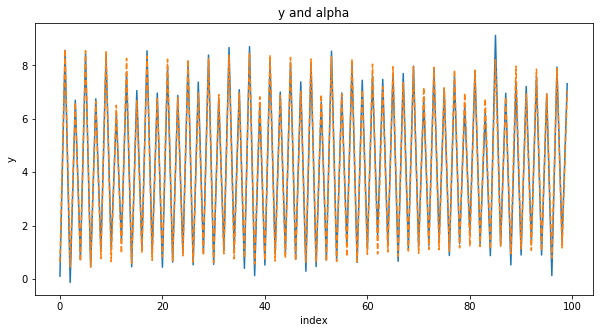

In [44]:
np.random.seed(55)
n = 100
e = np.random.normal(0, 0.4, n)
y = np.empty(n)
alpha = np.empty(n)
s = 4
sfactor = 10*np.random.uniform(0, 1, s)

y[0] = sfactor[0] + e[0]
y[1] = sfactor[1] + e[1]
y[2] = sfactor[2] + e[2]
y[3] = sfactor[3] + e[3]
alpha[0] = sfactor[0] + .2 * e[0]
alpha[1] = sfactor[1] + .2 * e[1]
alpha[2] = sfactor[2] + .2 * e[2]
alpha[3] = sfactor[3] + .2 * e[3]

for t in range(4, n):
    alpha[t] = alpha[t-s]+0.3*e[t]
    y[t] = alpha[t-s]+e[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha, '--')
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

The good news is that the same results as shown above apply since we are assuming that the same factors appear every quarter. Therefore we can estimate the model as follows:

In [45]:
s = 4
state = 0*np.ones(n)
e = 0*np.ones(n)
state[:s] = y[:s]


def logLikConc(myparam):
    gamma = abs(myparam)
    for t in range(s, n):
        e[t] = y[t]-state[t-s]
        state[t] = state[t-s]+gamma*e[t]
    temp = np.sum(np.power(e[1:], 2))/(n-1)
    return temp


myresults = minimize(logLikConc, .3, bounds=[[0, 1]])
print("this is the estimated gamma", '\n', np.round(myresults.x[0], 3))
print("this is the estimated variance of e", '\n', np.round(myresults.fun, 3))

this is the estimated gamma 
 0.325
this is the estimated variance of e 
 0.186


Where `np.round(myresults.fun, 3)` is the estimated signal-to-noise ratio. 

Suppose we want to generate a local level with drift (the model underlying the Theta method).

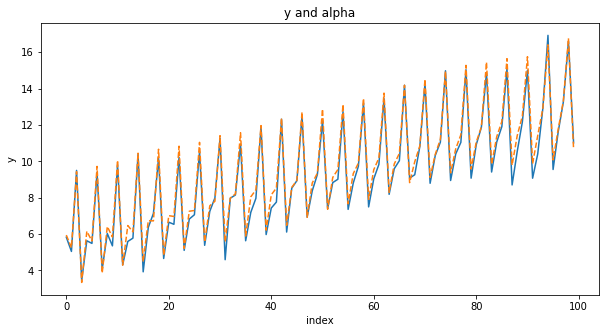

In [46]:
np.random.seed(1132)
n = 100
e = np.random.normal(0, 0.4, n)
y = np.empty(n)
alpha = np.empty(n)
s, co = 4, 0.3
sfactor = 10*np.random.uniform(0, 1, s)

y[0] = sfactor[0] + e[0]
y[1] = sfactor[1] + e[1]
y[2] = sfactor[2] + e[2]
y[3] = sfactor[3] + e[3]
alpha[0] = sfactor[0] + .2 * e[0]
alpha[1] = sfactor[1] + .2 * e[1]
alpha[2] = sfactor[2] + .2 * e[2]
alpha[3] = sfactor[3] + .2 * e[3]

for t in range(4, n):
    alpha[t] = co+alpha[t-s]+0.3*e[t]
    y[t] = alpha[t-s]+e[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, y, time, alpha, '--')
plt.xlabel('index')
plt.ylabel('y')
plt.title('y and alpha')
plt.show()

We can now estimate the model as follows:

In [47]:
s = 4
state = 0*np.ones(n)
e = 0*np.ones(n)
state[:s] = y[:s]


def logLikConc(myparam):
    gamma, co = abs(myparam[0]), abs(myparam[1])
    for t in range(s, n):
        e[t] = y[t]-state[t-s]
        state[t] = co+state[t-s]+gamma*e[t]
    temp = np.sum(np.power(e[1:], 2))/(n-1)
    return temp


myresults = minimize(logLikConc, [.2, .2])
print(myresults)

      fun: 0.1794150448316726
 hess_inv: array([[1.58828983, 0.00231247],
       [0.00231247, 0.06050941]])
      jac: array([1.32247806e-07, 4.80189919e-06])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 12
     njev: 14
   status: 0
  success: True
        x: array([0.29226242, 0.29609844])


## Forecasting time series

We have been discussing the estimation of state-space models but we did not discuss a crucial issue: how can we forecast time series?

One of the most important use of state-space model is to predict time series outside the estimation sample. 

A crucial role is played by the state variable $\alpha_t$. Indeed, the state variable (the unobserved component) is the key to predict our data h-steps ahead.

Consider again model (\ref{eq:ssmodel}) and suppose we want to forecast the $y_t$ variable $1,2,\cdots,h$-steps ahead. Then we have:

\begin{equation}
\label{eq:forecast}
\begin{split}
\hat{y}_{t+1}=z a_t=z(c+w a_{t-1}+k v_{t})\\
\\
\hat{y}_{t+2}=z*a_{t+1}=z*(c+w*a_{t})=z*c+w*\hat{y}_{t+1}\\
\\
\hat{y}_{t+3}=z*a_{t+2}=z*(c+w*a_{t+1})=z*c+w*\hat{y}_{t+2}\\
\\
\hat{y}_{t+4}=z*a_{t+3}=z*(c+w*a_{t+2})=z*c+w*\hat{y}_{t+3}\\
\vdots\\
\hat{y}_{t+h}=z*c+w*\hat{y}_{t+h-1}\\
\end{split}
\end{equation}

Note indeed that we know $v_t$ but we do not know $v_{t+1}$ as well as $v_{t+2}$ etc.

For example consider the following Theta method:

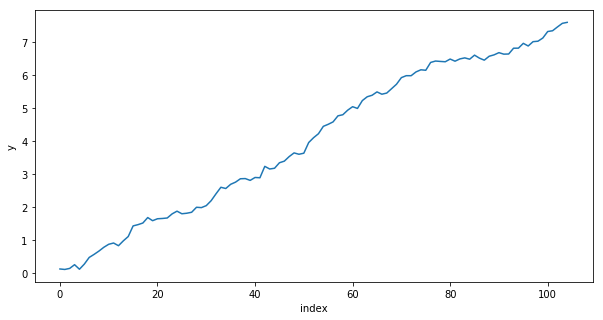

In [48]:
np.random.seed(134)
n = 105
e = np.random.normal(0, 0.5, n)
u = np.random.normal(0, 0.1, n)
y = np.empty(n)
alpha = np.empty(n)
co, y[0], alpha[0] = 0.06, e[0], u[0]

for t in range(1, n):
    alpha[t] = co+alpha[t - 1] + u[t]
    y[t] = alpha[t-1]+e[t]

time = np.linspace(0, n-1, n)
plt.figure(figsize=[10, 5])
plt.plot(time, alpha)
plt.xlabel('index')
plt.ylabel('y')
plt.show()

Suppose we know the first 100 observations and we do not know the last 5 observations. If we want to forecast them we need first to estimate the parameters and then run the forecasts.

A simple code is the following:

In [49]:
# I define x the variable with 100 observations.
n = 100
x = y[:]
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0], v[0] = x[1], 10000, 0


def funcTheta(parameters):
    q, co = abs(parameters[0]), abs(parameters[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1, n):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


results = minimize(funcTheta, [.6, .2])
z = w = 1
q, co, sigmae = results.x[0], results.x[1], 0

for t in range(1, n):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = x[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae += pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)

#This is the drift parameter
print('co = ', np.round(co, 4))
#This is the variance of e
print('sigmae = ', np.round(sigmae/(n-1), 4))
#This is the variance of u
print('sigmau = ', np.round(q*(sigmae/(n-1)), 4))

co =  0.0687
sigmae =  0.2342
sigmau =  0.0159


Now we can forecast x 5-steps ahead as follows:

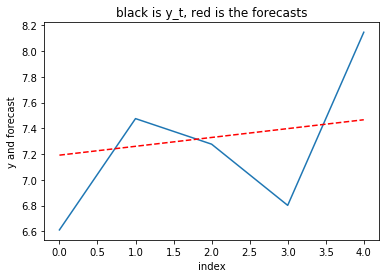

In [50]:
t = 5
MyForecasts = np.ones(t)
# This is my one-step ahead for x:
MyForecasts[0] = a[n-1]
MyForecasts[1] = co+MyForecasts[0]
MyForecasts[2] = co+MyForecasts[1]
MyForecasts[3] = co+MyForecasts[2]
MyForecasts[4] = co+MyForecasts[3]

time = np.linspace(0, t-1, t)
plt.figure()
plt.plot(time, y[99:104], time, MyForecasts, '--r')
plt.xlabel('index')
plt.ylabel('y and forecast')
plt.title('black is y_t, red is the forecasts')
plt.show()

## Forecasting seasonal series

Now consider the case of series affected by a seasonal factor. Suppose we wish to forecast the last 6 observations of this series (considering that we know only the first 100 observations):

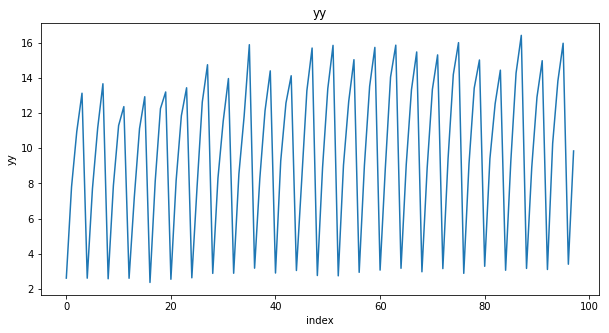

In [51]:
np.random.seed(4241)
n, h, co = 1293, 6, 0.03
e = np.random.normal(0, 0.4, n)
u = np.random.normal(0, 0.1, n)
my = np.empty(n)
alpha = np.empty(n)
factor = [.3, .9, 1.3, 1.5]
seasonal = np.tile(factor, n // 4+1)[:n]
my[0] = e[0]
alpha[0] = u[0]
for t in range(1, n):
    my[t] = seasonal[t]*(alpha[t-1]+e[t])
    alpha[t] = co+alpha[t-1]+u[t]
yy = my[300:398]

time = np.linspace(0, len(yy)-1, len(yy))
plt.figure(figsize=[10, 5])
plt.plot(time, yy)
plt.xlabel('index')
plt.ylabel('yy')
plt.title('yy')
plt.show()

For this type of series the forecasting procedure goes like this: (1) Apply the additive or multiplicative seasonal adjustment procedure discussed above  (2) forecast the deseasonalised series with the method you wish (3) add or multiply the seasonal factors to the forecast values obtained.

Remember that the additive or multiplicative procedure depends upon the type of seasonality we observe. If the seasonal component is amplified when the level of the series increase we use the multiplicative procedure. On the other hand, if the seasonal component is constant and is not amplified when the series increases then use the additive procedure.

In this example we suppose we know the first 100 observations and we leave the other 6 as forecasting sample.

In [52]:
y = yy[:len(yy)-h]
s, n = 4, len(y)
w = np.tile(1/(2*s), s+1)
w[1:s] = 1/s
cma = np.full(len(y), np.nan)
for g in range(len(y)-s):
    cma[int(g+s/2)] = np.sum(w*y[g:(g+s+1)])
residuals = y/cma
sfactors = np.empty(s)
for seas in range(s):
    temp = np.array([])
    sfactors[seas] = np.nanmean(residuals[slice(seas, len(y)-s+seas+1, s)])
sfactors = sfactors*s/np.sum(sfactors)
newseries = y/np.tile(sfactors, n//s+1)[:n]

We can now forecast the newly deseasonalised series and then multiply the forecast by the factors to obtain the seasonal forecasts. The code below makes the trick:

In [53]:
# standard Kalman filter approach
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0], v[0] = newseries[0], 10000, 0

def funcTheta(parameters):
    q, co = abs(parameters[0]), abs(parameters[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1, len(newseries)):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = newseries[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


results = minimize(funcTheta, [.6, .2])
z = w = 1
q, co, sigmae = results.x[0], results.x[1], 0

for t in range(1, len(newseries)):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = newseries[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae += pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)

#This is the drift parameter
print('co = ', np.round(co, 4))
#This is the variance of e
print('sigmae = ', np.round(sigmae/(n-1), 4))
#This is the variance of u
print('sigmau = ', np.round(q*(sigmae/(n-1)), 4))

co =  -0.02
sigmae =  0.2158
sigmau =  0.0056


Now we can forecast x 6-steps ahead and then multiply the factors to the out-of-sample forecasts, as follows:

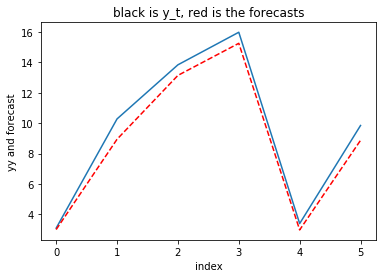

In [54]:
sfactnh = np.tile(sfactors, int((n+h)/s+1))[0:n+h]
sfactout = sfactnh[len(sfactnh)-h:len(sfactnh)]
w = z = 1
MyForecasts = np.array([])
MyForecasts = np.append(MyForecasts, a[len(newseries)-1])
for o in range(1, h):
    MyForecasts = np.append(MyForecasts, co+MyForecasts[o-1])
SeasonalForecast = MyForecasts*sfactout

time = np.linspace(0, h-1, h)
plt.figure()
plt.plot(time, yy[len(yy)-h:len(yy)], time, SeasonalForecast, '--r')
plt.xlabel('index')
plt.ylabel('yy and forecast')
plt.title('black is y_t, red is the forecasts')
plt.show()

Unsurprisingly the 6 steps forecasts fit very well the series in black.

## Comparing forecasting performance

Suppose we aim to compare two models when forecasting a specific time series. An important issue is to decide a metric that allow us to establish which model provide better forecasts for the series. The forecasting literature has long discussed the forecast evaluation metrics. Define $y_{t+1}\;y_{t+2}\;\cdots\;y_{t+h}$ the future values of a series (that we do not know) and $\hat{y}_{t+1}\;\hat{y}_{t+2}\;\cdots\;\hat{y}_{t+h}$ the forecasts provided by a specific model. Two popular evaluation metrics are the so called Mean-Absolute-Scaled-Error (MASE) and the Mean-Absolute-Percentage-Error (MAPE) that can be calculated as follows:


\begin{equation}
\label{eq:MASEsMAPE}
\begin{split}
MASE=\frac{1}{h}\frac{\sum_{t=n+1}^{n+h} |y_t-\hat{y}_t|}{\frac{1}{n-m}\sum_{t=m+1}^{n}|y_t-y_{t-m}|}\\
MAPE=\frac{2}{h}\sum_{t=n+1}^{n+h} \frac{|y_t-\hat{y}_t|}{|y_t|+|\hat{y}_t|} \times 100,
\end{split}
\end{equation}

Note that $h$ are the steps ahead; $n$ is the sample size while $m$ is
the frequency of the data (e.g., $m = 1$ for yearly data, $m = 4$ for quarterly data, $m = 12$ for monthly data, and so on).
Let's make an example. Suppose we want to forecast the number of $new cases$ of Coronavirus (Covid19) in the Italian region Lombardy (the most affected region by Covid). Below I provide the code to download data from internet. 

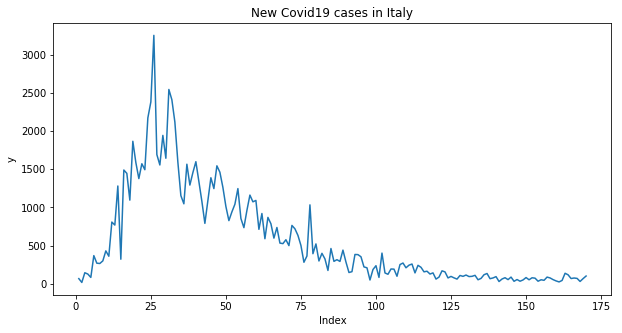

In [55]:
url = 'http://www.pangoo.it/coronavirus/?t=region&r=Lombardia&data=y#table'
data = pd.read_html(url)[0]
count = data['Totale casi'][:-1]
n = len(count)
temp = np.array([])
for i in range(n):
    temp = np.append(temp, int(count[i]))
y = np.diff(temp)

time = np.linspace(1, n-1, n-1)
plt.figure(figsize=[10, 5])
plt.plot(time, y)
plt.xlabel('Index')
plt.ylabel('y')
plt.title('New Covid19 cases in Italy')
plt.show()

Here I estimate the Theta method using the first observations and leaving the last 5 observations to be forecasted:

In [56]:
obs = len(y)-5
x = y[:obs]
a, p, k, v = [np.ones(n) for _ in range(4)]
a[0], p[0], v[0] = x[1], 10000, 0


def funcTheta(parameters):
    q, co = abs(parameters[0]), abs(parameters[1])
    z = w = 1
    likelihood = sigmae = 0
    for t in range(1, obs):
        k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
        p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+k[t]*v[t]
        sigmae += (pow(v[t], 2)/(pow(z, 2)*p[t-1]+1))
        likelihood += .5*math.log(2*math.pi)+.5+.5*math.log(pow(z, 2)*p[t-1]+1)
    return likelihood+.5*n*math.log(sigmae/n)


results = minimize(funcTheta, [.6, .2])
z = w = 1
q, co, sigmae = results.x[0], results.x[1], 0

for t in range(1, obs):
    k[t] = (z*w*p[t-1])/(pow(z, 2)*p[t-1]+1)
    p[t] = pow(w, 2)*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t] = x[t]-z*a[t-1]
    a[t] = co+w*a[t-1]+k[t]*v[t]
    sigmae += pow(v[t], 2)/(pow(z, 2)*p[t-1]+1)

#This is the drift parameter
print('co = ', np.round(co, 9))
#This is the variance of e
print('sigmae = ', np.round(sigmae/(n-1), 4))
#This is the variance of u
print('sigmau = ', np.round(q*(sigmae/(n-1)), 4))

co =  0.071967361
sigmae =  27057.434
sigmau =  20470.0274


Here I forecast:

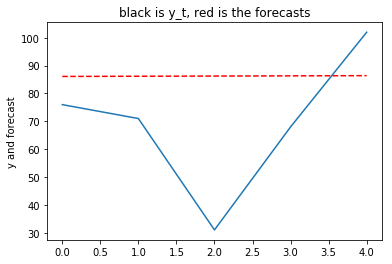

In [57]:
t = 5
MyForecasts = np.ones(t)
# This is my one-step ahead for x:
MyForecasts[0] = a[obs-1]
MyForecasts[1] = co+MyForecasts[0]
MyForecasts[2] = co+MyForecasts[1]
MyForecasts[3] = co+MyForecasts[2]
MyForecasts[4] = co+MyForecasts[3]

time = np.linspace(0, t-1, t)
plt.figure()
plt.plot(time, y[len(y)-t:len(y)], time, MyForecasts, '--r')
plt.ylabel('y and forecast')
plt.title('black is y_t, red is the forecasts')
plt.show()

I can now compute the MASE for this method as follows:

In [58]:
MASE = np.mean(np.abs(y[(len(y)-5):len(y)]-MyForecasts)/np.mean(np.abs(np.diff(x))))
print('MASE = ', np.round(MASE, 3))

MASE =  0.139


Note in fact that **diff** provides the first difference of a vector: 

In [59]:
v = np.array([3, 1, 4, 8, 2])
print(np.diff(v))

[-2  3  4 -6]


While the sMAPE can be computed as follows:

In [60]:
MAPE = np.mean(200*np.abs(y[(len(y)-5):len(y)]-MyForecasts)/(np.abs(MyForecasts)+np.abs(y[(len(y)-5):len(y)])))
print('MAPE = ', np.round(MAPE, 3))

MAPE =  33.276


Now suppose I want to compare the performance with the simple exponential smoothing (Local level model) using the SSOE assumption. I need to estimate and predict the series:

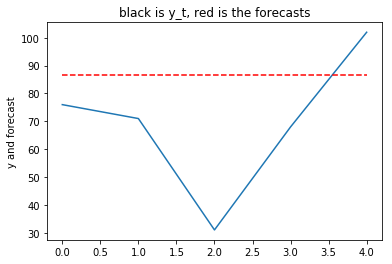

In [61]:
a = 0*np.ones(obs)
v = 0*np.ones(obs)
a[0] = x[0]


def logLikConc(myparam):
    gamma = abs(myparam)
    w, z, co = 1, 1, 0
    for t in range(1, obs):
        v[t] = x[t]-z*a[t-1]
        a[t] = co+w*a[t-1]+gamma*v[t]
    temp = np.sum(np.power(v[1:obs], 2))
    return temp


myresults = minimize(logLikConc, 0.1, bounds=[[0, 1]])
w = z = 1
a = 0*np.ones(obs)
v = 0*np.ones(obs)
a[0] = x[0]
gamma = myresults.x[0]
for t in range(1, obs):
    v[t] = x[t] - z * a[t - 1]
    a[t] = co + w * a[t - 1] + gamma * v[t]

t = 5
LLForecasts = np.ones(t)
# This is my one-step ahead for x:
LLForecasts[0] = a[obs-1]
LLForecasts[1] = LLForecasts[0]
LLForecasts[2] = LLForecasts[1]
LLForecasts[3] = LLForecasts[2]
LLForecasts[4] = LLForecasts[3]

time = np.linspace(0, t-1, t)
plt.figure()
plt.plot(time, y[len(y)-t:len(y)], time, LLForecasts, '--r')
plt.ylabel('y and forecast')
plt.title('black is y_t, red is the forecasts')
plt.show()

Now if we compare the results of the MASE we have:

In [62]:
MASETHETA = np.mean(np.abs(y[(len(y)-5):len(y)]-MyForecasts)/np.mean(np.abs(np.diff(x))))
MASELL = np.mean(np.abs(y[(len(y)-5):len(y)]-LLForecasts)/np.mean(np.abs(np.diff(x))))
print('MASETHETA = ', np.round(MASETHETA, 3), '\n', 'MASELL = ', np.round(MASELL, 3))

MASETHETA =  0.139 
 MASELL =  0.14


Lets check the MAPE:

In [63]:
MAPETHETA = np.mean(200*np.abs(y[(len(y)-5):len(y)]-MyForecasts)/(np.abs(MyForecasts)+np.abs(y[(len(y)-5):len(y)])))
MAPELL = np.mean(200*np.abs(y[(len(y)-5):len(y)]-LLForecasts)/(np.abs(LLForecasts)+np.abs(y[(len(y)-5):len(y)])))
print('MAPETheta = ', np.round(MAPETHETA, 3), '\n', 'MAPELL = ', np.round(MAPELL, 3))

MAPETheta =  33.276 
 MAPELL =  33.507


## Forecast competion in action!

Suppose we have a dataset and we want to compare the forecast performance of different models using the MASE and the MAPE as above.

Below we provide the code for forecasting $h-steps$ ahead using: Model 1 in both the multiple source of error (MSOE) version and the SSOE version. Same for the Theta method in both versions and the damped trend model (SSOE only).

In [64]:
def ForecastARkf(y, h):
    n = len(y)
    a, p, k, v = [np.ones(n) for _ in range(4)]
    a[0], p[0] = y[0], 10000

    def fu(mypa):
        q, co, w = abs(mypa[0]), abs(mypa[1]), 1-math.exp(-abs(mypa[2]))
        z = 1
        likelihood = sigmae = 0
        for t in range(1, n):
            k[t] = (z * w * p[t - 1]) / (pow(z, 2) * p[t - 1] + 1)
            p[t] = pow(w, 2) * p[t - 1] - w * z * k[t] * p[t - 1] + q
            v[t] = y[t] - z * a[t - 1]
            a[t] = co + w * a[t - 1] + k[t] * v[t]
            sigmae += (pow(v[t], 2) / (pow(z, 2) * p[t - 1] + 1))
            likelihood += .5 * math.log(2 * math.pi) + .5 + .5 * math.log(pow(z, 2) * p[t - 1] + 1)
        return likelihood + .5 * n * math.log(sigmae / n)

    results = minimize(fu, [.2, 1, 2])
    v[0], z = 0, 1
    q, co, w, sigmae = abs(results.x[0]), results.x[1], 1-math.exp(-abs(results.x[2])), 0
    for t in range(1, n):
        k[t] = (z * w * p[t - 1]) / (pow(z, 2) * p[t - 1] + 1)
        p[t] = pow(w, 2) * p[t - 1] - w * z * k[t] * p[t - 1] + q
        v[t] = y[t] - z * a[t - 1]
        a[t] = co + w * a[t - 1] + k[t] * v[t]
        sigmae = sigmae + pow(v[t], 2) / (pow(z, 2) * p[t - 1] + 1)
    Forec = np.array([a[len(y)-1]])
    for i in range(1, h):
        Forec = np.append(Forec, co+w*Forec[i-1])
    return Forec


def ForecastAR(y, h):
    state = 0*np.ones(len(y))
    v = 0*np.ones(len(y))
    state[0] = y[0]

    def logLikConc(myparam):
        w, gamma, co = 1 - math.exp(-abs(myparam[0])), abs(myparam[1]), abs(myparam[2])
        for t in range(1, len(y)):
            v[t] = y[t]-state[t-1]
            state[t] = co+w*state[t-1]+gamma*v[t]
        temp = np.sum(np.power(v[1:len(y)], 2))
        return temp

    result = minimize(logLikConc, [2, .2, 1])
    w, gamma, co = 1 - math.exp(-abs(result.x[0])), abs(result.x[1]), abs(result.x[2])
    for t in range(1, len(y)):
        v[t] = y[t] - state[t - 1]
        state[t] = co + w * state[t - 1] + gamma * v[t]
    Forec = np.array([state[len(y) - 1]])
    for i in range(1, h):
        Forec = np.append(Forec, co + w * Forec[i - 1])
    return Forec


def ForecastTheta(y, h):
    state = 0 * np.ones(len(y))
    v = 0 * np.ones(len(y))
    state[0] = y[0]

    def logLikConc(myparam):
        w, gamma, co = 1, abs(myparam[0]), abs(myparam[1])
        for t in range(1, len(y)):
            v[t] = y[t]-state[t-1]
            state[t] = co+w*state[t-1]+gamma*v[t]
        temp = np.sum(np.power(v[1:len(y)], 2))
        return temp

    result = minimize(logLikConc, [.3, 1])
    w, gamma, co = 1, abs(result.x[0]), abs(result.x[1])
    for t in range(1, len(y)):
        v[t] = y[t] - state[t - 1]
        state[t] = co + w * state[t - 1] + gamma * v[t]
    Forec = np.array([state[len(y) - 1]])
    for i in range(1, h):
        Forec = np.append(Forec, co + w * Forec[i - 1])
    return Forec


def ForecastThetakf(y, h):
    n = len(y)
    a, p, k, v = [np.ones(n) for _ in range(4)]
    a[0], p[0], v[0] = y[0], 10000, 0

    def funcTheta(parameters):
        q, co = abs(parameters[0]), abs(parameters[1])
        z = w = 1
        likelihood = sigmae = 0
        for t in range(1, n):
            k[t] = (z * w * p[t - 1]) / (pow(z, 2) * p[t - 1] + 1)
            p[t] = pow(w, 2) * p[t - 1] - w * z * k[t] * p[t - 1] + q
            v[t] = y[t] - z * a[t - 1]
            a[t] = co + w * a[t - 1] + k[t] * v[t]
            sigmae += (pow(v[t], 2) / (pow(z, 2) * p[t - 1] + 1))
            likelihood += .5 * math.log(2 * math.pi) + .5 + .5 * math.log(pow(z, 2) * p[t - 1] + 1)
        return likelihood + .5 * n * math.log(sigmae / n)

    results = minimize(funcTheta, [.3, 1])
    q, co = abs(results.x[0]), abs(results.x[1])
    z = w = 1
    for t in range(1, n):
        k[t] = (z * w * p[t - 1]) / (pow(z, 2) * p[t - 1] + 1)
        p[t] = pow(w, 2) * p[t - 1] - w * z * k[t] * p[t - 1] + q
        v[t] = y[t] - z * a[t - 1]
        a[t] = co + w * a[t - 1] + k[t] * v[t]
    Forecast = np.array([a[len(y) - 1]])
    for i in range(1, h):
        Forecast = np.append(Forecast, co + w * Forecast[i - 1])
    return Forecast


def ForecastDamped(y, h):
    obs = len(y)
    damped = 0*np.ones([obs, 2])
    damped[0, 0] = y[0]
    damped[0, 1] = 0
    inn = 0*np.ones(obs)

    def fmsoe(param):
        k1, k2, k3 = abs(param[0]), abs(param[1]), abs(param[2])
        for t in range(1, obs):
            inn[t] = y[t]-damped[t-1, 0]-k3*damped[t-1, 1]
            damped[t, 0] = damped[t-1, 0]+k3*damped[t-1, 1]+k1*inn[t]
            damped[t, 1] = k3*damped[t-1, 1]+k2*inn[t]
        temp = np.sum(np.power(inn, 2)/obs)
        return temp

    result = minimize(fmsoe, np.random.uniform(0, 1, 3))
    k1, k2, k3 = abs(result.x[0]), abs(result.x[1]), abs(result.x[2])
    if k3 > 1:
        k3 = 1
    for t in range(1, obs):
        inn[t] = y[t] - damped[t - 1, 0] - k3 * damped[t - 1, 1]
        damped[t, 0] = damped[t - 1, 0] + k3 * damped[t - 1, 1] + k1 * inn[t]
        damped[t, 1] = k3 * damped[t - 1, 1] + k2 * inn[t]
    Forecast = np.array([damped[obs-1, 0]+k3 * damped[obs-1, 1]])
    for i in range(1, h):
        Forecast = np.append(Forecast, Forecast[i - 1] + damped[obs-1, 1] * np.power(k3, i))
    return Forecast

We can now run a real forecast competition evaluating for each model the MASE and sMAPE and their mean and median across the series of the competition. Here we make use of the well known M3-forecast competition as proposed by Spyros Makridakis. 

In [65]:
MM = pd.read_csv('Mcomp_M3_DataPDF.csv', header=None)

Below we report the chunck running the competition and showing the results for the mentioned competitors

In [ ]:
# replic = 20
replic = len(MM)
steps = 6
Method1, Method2, Method3, Method4, Method5, Err1, Err2 = [0*np.ones([replic, steps]) for _ in range(7)]
Err3, Err4, Err5, sErr1, sErr2, sErr3, sErr4, sErr5 = [0*np.ones([replic, steps]) for _ in range(8)]
for g in range(replic):
    y = np.array(MM.iloc[g][:])
    y = np.array([x for x in y if not math.isnan(x)])[:-steps]
    # For the M4 competition use y<-MM[[g]][[2]]
    Method1[g][:] = ForecastAR(y, steps)
    Method2[g][:] = ForecastARkf(y, steps)
    Method3[g][:] = ForecastTheta(y, steps)
    Method4[g][:] = ForecastThetakf(y, steps)
    Method5[g][:] = ForecastDamped(y, steps)

    Err1[g][:] = np.array(MM.iloc[g][-steps:])-Method1[g][:]
    Err2[g][:] = np.array(MM.iloc[g][-steps:])-Method2[g][:]
    Err3[g][:] = np.array(MM.iloc[g][-steps:])-Method3[g][:]
    Err4[g][:] = np.array(MM.iloc[g][-steps:])-Method4[g][:]
    Err5[g][:] = np.array(MM.iloc[g][-steps:])-Method5[g][:]

    sErr1[g][:] = Err1[g][:] / np.mean(np.abs(np.diff(y)))
    sErr2[g][:] = Err2[g][:] / np.mean(np.abs(np.diff(y)))
    sErr3[g][:] = Err3[g][:] / np.mean(np.abs(np.diff(y)))
    sErr4[g][:] = Err4[g][:] / np.mean(np.abs(np.diff(y)))
    sErr5[g][:] = Err5[g][:] / np.mean(np.abs(np.diff(y)))
ResultsMAPE = 0*np.ones([steps, 18])

for s in range(steps):
    sMAPE = 0*np.ones([replic, 5])
    for i in range(replic):
        temp = np.array(MM.iloc[i][-steps:])
        sMAPE[i][0] = np.mean(200 * abs(Err1[i][0:s+1]) / (abs(Method1[i][:][0:s+1]) + abs(temp[0:s+1])))
        sMAPE[i][1] = np.mean(200 * abs(Err2[i][0:s+1]) / (abs(Method2[i][:][0:s+1]) + abs(temp[0:s+1])))
        sMAPE[i][2] = np.mean(200 * abs(Err3[i][0:s+1]) / (abs(Method3[i][:][0:s+1]) + abs(temp[0:s+1])))
        sMAPE[i][3] = np.mean(200 * abs(Err4[i][0:s+1]) / (abs(Method4[i][:][0:s+1]) + abs(temp[0:s+1])))
        sMAPE[i][4] = np.mean(200 * abs(Err5[i][0:s+1]) / (abs(Method5[i][:][0:s+1]) + abs(temp[0:s+1])))
    ResultsMAPE[s][0] = np.mean(sMAPE[:, 0])
    ResultsMAPE[s][1] = np.mean(sMAPE[:, 1])
    ResultsMAPE[s][2] = np.mean(sMAPE[:, 2])
    ResultsMAPE[s][3] = np.mean(sMAPE[:, 3])
    ResultsMAPE[s][4] = np.mean(sMAPE[:, 4])
    ResultsMAPE[s][5] = np.mean(sMAPE[:, 0]) / np.mean(sMAPE[:, 1])
    ResultsMAPE[s][6] = np.mean(sMAPE[:, 0]) / np.mean(sMAPE[:, 2])
    ResultsMAPE[s][7] = np.mean(sMAPE[:, 0]) / np.mean(sMAPE[:, 3])
    ResultsMAPE[s][8] = np.mean(sMAPE[:, 0]) / np.mean(sMAPE[:, 4])
    ResultsMAPE[s][9] = np.median(sMAPE[:, 0])
    ResultsMAPE[s][10] = np.median(sMAPE[:, 1])
    ResultsMAPE[s][11] = np.median(sMAPE[:, 2])
    ResultsMAPE[s][12] = np.median(sMAPE[:, 3])
    ResultsMAPE[s][13] = np.median(sMAPE[:, 4])
    ResultsMAPE[s][14] = np.median(sMAPE[:, 0]) / np.median(sMAPE[:, 1])
    ResultsMAPE[s][15] = np.median(sMAPE[:, 0]) / np.median(sMAPE[:, 2])
    ResultsMAPE[s][16] = np.median(sMAPE[:, 0]) / np.median(sMAPE[:, 3])
    ResultsMAPE[s][17] = np.median(sMAPE[:, 0]) / np.median(sMAPE[:, 4])

ResultsMASE = 0*np.ones([steps, 18])

for s in range(steps):
    sMASE = 0*np.ones([replic, 5])
    for i in range(replic):
        temp = np.array(MM.iloc[i][-steps:])
        sMASE[i][0] = np.mean(abs(sErr1[i][0:s+1]))
        sMASE[i][1] = np.mean(abs(sErr2[i][0:s+1]))
        sMASE[i][2] = np.mean(abs(sErr3[i][0:s+1]))
        sMASE[i][3] = np.mean(abs(sErr4[i][0:s+1]))
        sMASE[i][4] = np.mean(abs(sErr5[i][0:s+1]))
    ResultsMASE[s][0] = np.mean(sMASE[:, 0])
    ResultsMASE[s][1] = np.mean(sMASE[:, 1])
    ResultsMASE[s][2] = np.mean(sMASE[:, 2])
    ResultsMASE[s][3] = np.mean(sMASE[:, 3])
    ResultsMASE[s][4] = np.mean(sMASE[:, 4])
    ResultsMASE[s][5] = np.mean(sMASE[:, 0]) / np.mean(sMASE[:, 1])
    ResultsMASE[s][6] = np.mean(sMASE[:, 0]) / np.mean(sMASE[:, 2])
    ResultsMASE[s][7] = np.mean(sMASE[:, 0]) / np.mean(sMASE[:, 3])
    ResultsMASE[s][8] = np.mean(sMASE[:, 0]) / np.mean(sMASE[:, 4])
    ResultsMASE[s][9] = np.median(sMASE[:, 0])
    ResultsMASE[s][10] = np.median(sMASE[:, 1])
    ResultsMASE[s][11] = np.median(sMASE[:, 2])
    ResultsMASE[s][12] = np.median(sMASE[:, 3])
    ResultsMASE[s][13] = np.median(sMASE[:, 4])
    ResultsMASE[s][14] = np.median(sMASE[:, 0]) / np.median(sMASE[:, 1])
    ResultsMASE[s][15] = np.median(sMASE[:, 0]) / np.median(sMASE[:, 2])
    ResultsMASE[s][16] = np.median(sMASE[:, 0]) / np.median(sMASE[:, 3])
    ResultsMASE[s][17] = np.median(sMASE[:, 0]) / np.median(sMASE[:, 4])

print('ResultsMASE:', '\n', np.round(ResultsMASE, 3), '\n')
print('ResultsMASE col mean:', '\n', np.round(np.mean(ResultsMASE, axis=0), 3), '\n')
print('ResultsMAPE:', '\n', np.round(ResultsMAPE, 3), '\n')
print('ResultsMAPE col mean:', '\n', np.round(np.mean(ResultsMAPE, axis=0), 3), '\n')

D:\DataScience\Anaconda3-2019.3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
D:\DataScience\Anaconda3-2019.3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
D:\DataScience\Anaconda3-2019.3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
D:\DataScience\Anaconda3-2019.3\lib\site-packages\scipy\optimize\optimize.py:1020: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
D:\DataScience\Anaconda3-2019.3\lib\site-packages\ipykernel_launcher.py:128: RuntimeWarning: overflow encountered in power
D:\DataScience\Anaconda3-2019.3\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((x